# <font color=blue>SENTIMENT ANALYSIS AND TEXT MINING CAPSTONE PROJECT </font>

<h1> Loading and analyzing Amazon Mobile Reviews Dataset

In [1]:
import pandas as pd
import numpy as np
import random

- Reading the csv file into the Dataframe 

In [2]:
#df = pd.read_csv("D:\Study\Courses\Sentiment_Analysis\Amazon_Unlocked_Mobile\Amazon_Unlocked_Mobile.csv")

p = 0.05  # 5% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv("D:\Study\Courses\Sentiment_Analysis\Amazon_Unlocked_Mobile\Amazon_Unlocked_Mobile.csv",
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)

- Using the sample method to look at some random reviews present in our dataset

In [3]:
df.sample(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
3875,Apple iPhone SE Unlocked Phone -16 GB Retail P...,Apple,438.95,5,pretty good,0.0
11058,"LG G3 D855 Factory Unlocked Cellphone, Interna...",LG,195.99,1,"Phone is goodbut Power is off, a round piece m...",0.0
1133,"Apple iPhone 5 Unlocked Cellphone, 64GB, White",Apple,314.95,1,"this ad says in the description ""Item model nu...",60.0
18154,Samsung Galaxy S6 Edge Plus G928C 32GB Unlocke...,Samsung,459.99,5,Nice and super,0.0
11437,"LG Lucid 2, Black 8GB (Verizon Wireless)",LG,79.95,1,JUNK!!!,2.0
1570,Apple iPhone 5c 32GB (Pink) - Verizon Wireless,Apple,159.99,5,Honestly freaked me out a little because it di...,4.0
15868,Samsung Galaxy J5 SM-J500H/DS GSM Factory Unlo...,Samsung,168.99,5,The phone is working perfectly,0.0
8767,CNPGD All-in-1 Watch Cell Phone & Smart Watch ...,NaN,59.99,2,The watch is a joke don't buy it at all please...,0.0
7124,BLU Studio 7.0 II -Unlocked Smartphone - US GS...,BLU,95.88,1,hell no never buy this phone,0.0
3794,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,505.99,1,So disappointed. It doesn't work on Verizon ne...,0.0


- Checking total number of reviews

In [4]:
print("Number of reviews: {}".format(len(df)))

Number of reviews: 20688


- Creating new column which shows sentiment

In [5]:
#Drop the missing values.
df.dropna(inplace=True)

#remove any neutral rating equals to 3.
df = df[df['Rating']!=3]

#Encode 4 star and 5 star as positively rated 1.
#Encode 1 star and 2 star as poorely rated 0.
df['sentiment'] = np.where(df['Rating']>3,1,0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,The battery was old & had been over used becau...,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I purchased this phone in December as a christ...,19.0,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,Just... not good. The phone has great screen r...,0.0,0
5,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,5,Bought for my mom! She loves it!,8.0,1
6,2016 Latest Mini6 Small Android 5.1 Smart Mobi...,Phone Baby,79.95,5,This little phone is great compact and easy to...,1.0,1
7,3 Pack Replacement Belt Clip Holster for Otter...,OtterBox,17.95,4,Works great.,0.0,1
8,3 Pack Replacement Belt Clip Holster for Otter...,OtterBox,17.95,5,not as thick as my old one but it will do!,0.0,1
20,"5.0"" Cell Phones Unlocked Android 5.1 MTK6580 ...",JUNING,89.99,2,"It was slow, but worked fine. However after on...",0.0,0
21,"5.0"" Elephone P6000 MTK6732 64-bit Quad Core 2...",Elephone,161.06,2,No 4g with ATT just 2g,0.0,0


<h1> Dataset Visualization

- Importing the pyplot module from the matplotlib package

In [6]:
import matplotlib.pyplot as plt

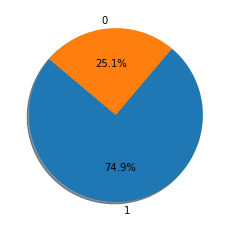

In [7]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Printing the count of positive and negative reviews

In [8]:
print("Number of + reviews: {}".format(df[df["sentiment"]==1].count()[0]))
print("Number of - reviews: {}".format(df[df["sentiment"]==0].count()[0]))

Number of + reviews: 11524
Number of - reviews: 3852


<h3> Wordclouds

We have used the Wordclouds package to get a quick overview of most recurrent words in the text corpus

In [9]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

- The words most often present in positive reviews?

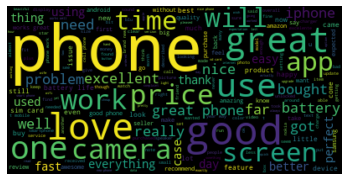

In [10]:
pos_reviews = df[df["sentiment"]==1]
txt = " ".join(review.lower() for review in pos_reviews["Reviews"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

- The words most often present in negative reviews?

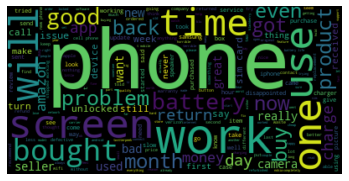

In [11]:
neg_reviews = df[df["sentiment"]==0]
txt = " ".join(tweet.lower() for tweet in neg_reviews["Reviews"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h1>Text Normalization

<h2> 1. Word Features
   

- Removing Upper Capitalization : Lower case each letter in a specific review

In [12]:
import re #REGEX

In [13]:
def to_lowercase(Reviews):
  Reviews = Reviews.lower()
  return Reviews

* Word repetition : Replace word repetition with a single occurence

In [14]:
def word_repetition(Reviews):
  Reviews = re.sub(r'(.)\1+', r'\1\1', Reviews)
  return Reviews

* Punctuation repetition : Replace punctuation repetition with a single occurence (For example: "!!!!!" becomes "!")

In [15]:
def punct_repetition(Reviews, default_replace=""):
  Reviews = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, Reviews)
  return Reviews

* Word contraction: <br>
STEP 1 : Installing and importing contractions package

In [16]:
import contractions

In [17]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [17]:
def fix_contractions(Reviews):
  Reviews = contractions.fix(Reviews)
  return Reviews

<h2> 2. Tokenization

In [18]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Importing the string package

In [19]:
import string

* Retrieving english punctuation signs by using the string package

In [20]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* Importing the stopwords module from NLTK
* Downloading stopwords data from NLTK

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* Creating a set of english stopwords

In [22]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'y', "you'd", "hadn't", "wouldn't", 'yourselves', 'ours', 'against', 'further', 'each', 'as', 'than', 'until', 'hasn', 'after', 'because', 'over', 'being', 'here', 'at', 'too', 'ourselves', 'both', 'did', 'shouldn', 'his', "isn't", 'needn', 'll', 'theirs', 'no', 'them', 'but', 'didn', 'myself', 'in', 'that', 'not', 'so', 'any', 've', "shouldn't", 'him', 'doesn', 'can', 'himself', 'our', 'while', 'this', "that'll", 'am', 'where', 'weren', 'more', "you've", 'when', 'above', 'had', 'from', 're', 'who', 'those', 'few', "hasn't", 'couldn', 'to', 'such', 'won', 'same', 'and', 'just', 'don', 'we', 'will', "doesn't", 'doing', 'if', 'these', "she's", 'there', 'yourself', 'its', "haven't", 'itself', 'mustn', 's', 'into', 'an', 'me', "don't", 'once', 'was', 'have', 'a', 'all', 'most', 'mightn', "needn't", "aren't", 'i', 'which', 'some', 'on', 'under', 'their', 'before', "should've", 'd', 'of', 'up', "you're", 'they', 'why', 'are', 'by', 'should', 'were', "mustn't", 'or', 'with', "it's", 'having'

* Creating a custom_tokenize function

In [23]:
def custom_tokenize(Reviews,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(Reviews)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

Testing the function with a random review

In [24]:
Reviews = "these are 5 different words!"

In [25]:
print("Review tokens: {}".format(custom_tokenize(Reviews, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Review tokens: {}".format(custom_tokenize(Reviews, keep_stop=True)))
print("Review tokens: {}".format(custom_tokenize(Reviews, keep_alnum=True)))

Review tokens: ['these', 'are', '5', 'different', 'words', '!']
Review tokens: ['these', 'are', 'different', 'words']
Review tokens: ['5', 'different', 'words']


<h2> 3. Stemming

Importing the different libraries and modules used for stemming

In [26]:
from nltk.stem.snowball import SnowballStemmer

In [27]:
tokens = ["manager", "management", "managing"] #Example for testing function

In [28]:
#Defining stemmers directly using NLTK
snowball_stemmer = SnowballStemmer('english')

Creating a stem_tokens function that takes the list of tokens as input and returns a list of stemmed tokens

In [29]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

Testing out our stemmer function

In [30]:
print("Snowball stems: {}".format(stem_tokens(tokens, snowball_stemmer)))

Snowball stems: ['manag', 'manag', 'manag']


<h2> 4. Lemmatization

* Importing different libraries and modules used for lemmatization

In [31]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* Sample list of tokens to lemmatize

In [32]:
tokens = ["international", "companies", "had", "interns"]

* Part of Speech (POS) tagging

In [33]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

* Creating the lemmatizer by using the WordNet module

In [34]:
lemmatizer = WordNetLemmatizer()

* Creating a lemmatize_tokens function that takes the list of tokens as input and returns a list of lemmatized tokens

In [35]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [36]:
print("Review lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Review lemma: ['international', 'company', 'have', 'intern']


<h2> Combining all Text normalization functions together

In [37]:
def process_review(Reviews, verbose=False):
  if verbose: print("Initial tweet: {}".format(review))

  ## Word Features
  Reviews = to_lowercase(Reviews) # lower case
  Reviews = fix_contractions(Reviews) # replace contractions
  Reviews = punct_repetition(Reviews) # replace punctuation repetition
  Reviews = word_repetition(Reviews) # replace word repetition
 
  if verbose: print("Post Word processing review: {}".format(Reviews))

  ## Tokenization & Stemming
  tokens = custom_tokenize(Reviews, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

* Testing out our function:

In [38]:
complex_review = "I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!"

In [39]:
print(process_review(complex_review, verbose=False))

['feel', 'lucki', 'found', 'use', 'phone', 'us', 'not', 'use', 'hard', 'phone', 'line', 'someon', 'upgrad', 'sold', 'one', 'son', 'like', 'old', 'one', 'final', 'fell', 'apart', 'year', 'not', 'want', 'upgrad', 'thank', 'seller', 'realli', 'appreci', 'honesti', 'said', 'use', 'recommend', 'seller', 'high', 'would']


<h1> Text Representation 

<h3> 1. Processing Reviews

In [40]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
df["tokens"] = df["Reviews"].apply(process_review)

In [42]:
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,sentiment,tokens
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1,"[great, phone, replac, lost, phone, thing, vol..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,The battery was old & had been over used becau...,0.0,1,"[batteri, old, use, bare, hold, charg, otherwi..."
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I purchased this phone in December as a christ...,19.0,0,"[purchas, phone, decemb, christma, present, so..."
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,Just... not good. The phone has great screen r...,0.0,0,"[not, good, phone, great, screen, resolut, sto..."
5,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,5,Bought for my mom! She loves it!,8.0,1,"[bought, mom, love]"
6,2016 Latest Mini6 Small Android 5.1 Smart Mobi...,Phone Baby,79.95,5,This little phone is great compact and easy to...,1.0,1,"[littl, phone, great, compact, easi, use, love]"
7,3 Pack Replacement Belt Clip Holster for Otter...,OtterBox,17.95,4,Works great.,0.0,1,"[work, great]"
8,3 Pack Replacement Belt Clip Holster for Otter...,OtterBox,17.95,5,not as thick as my old one but it will do!,0.0,1,"[not, thick, old, one]"
20,"5.0"" Cell Phones Unlocked Android 5.1 MTK6580 ...",JUNING,89.99,2,"It was slow, but worked fine. However after on...",0.0,0,"[slow, work, fine, howev, week, would, not, ch..."
21,"5.0"" Elephone P6000 MTK6732 64-bit Quad Core 2...",Elephone,161.06,2,No 4g with ATT just 2g,0.0,0,[att]


* Converting DataFrame to two lists: one for the review tokens (X) and one for the review sentiment (y)

In [43]:
X = df["tokens"].tolist()
y = df["sentiment"].tolist()

<h3> Term Frequency – Inverse Document Frequency (TF-IDF)

* Import TfidfVectorizer from the Scikit-learn Library

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

Create a fit_tfidf function used to build the TF-IDF vectorizer with the corpus tokens (X)

In [45]:
def fit_tfidf(review_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(review_corpus)
  return tf_vect

* Use the fit_cv function to fit the vectorizer on the corpus, and transform the corpus

In [46]:
tf_vect = fit_tfidf(X)
tf_mtx = tf_vect.transform(X)

C:\Users\Arvin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


* Get the vectorizer features (matrix columns)

In [47]:
ft = tf_vect.get_feature_names()

In [48]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 10040 features in this corpus
['aac', 'aat', 'ab', 'abandon', 'abandonado', 'abbrevi', 'abc', 'abd', 'abesolu', 'abil', 'abili', 'abirthday', 'abit', 'abl', 'abnorm', 'abort', 'abou', 'abouth', 'abras', 'abrir', 'abroad', 'abrupt', 'absent', 'absoleto', 'absolut', 'absolutament', 'absolutley', 'absorb', 'absorpt', 'absoult', 'absoulti', 'absout', 'absulout', 'absurd', 'absutley', 'abund', 'abus', 'abuss', 'abysm', 'ac', 'aca', 'acabado', 'acabo', 'acabó', 'academi', 'acc', 'acced', 'acceler', 'acceleromet', 'accent', 'accept', 'acces', 'acceseri', 'acceso', 'accesori', 'accesorio', 'access', 'accessari', 'accesscamera', 'accessibilitybtnotif', 'accessor', 'accessori', 'accessoriescon', 'accessoriesth', 'accesstil', 'accid', 'accident', 'accion', 'accommod', 'accompani', 'accomplish', 'accord', 'account', 'accs', 'accsesori', 'acct', 'accumul', 'accur', 'accuraci', 'accuratecam', 'accustom', 'ace', 'acelera', 'acept', 'aceptò', 'acer', 'acertada', 'acessori', 'achiev', 'achill

* Print the matrix shape

In [49]:
print(tf_mtx.shape)

(15376, 10040)


* Convert the matrix to an array

In [50]:
tf_mtx.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* Transform a new review by using the vectorizer

In [51]:
new_review = [["I", "hate", "this","phone"]]
tf_vect.transform(new_review).toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

<h2> Sentiment Model

### Helper function

This function will be used to plot the confusion matrix for the different models we will create

In [52]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

<h4> 1. Train/Test Split

* Check what X and y looks like

In [53]:
print(X)
print(y)

[['great', 'phone', 'replac', 'lost', 'phone', 'thing', 'volum', 'button', 'not', 'work', 'still', 'go', 'set', 'adjust', 'job', 'elig', 'upgrad', 'phone'], ['batteri', 'old', 'use', 'bare', 'hold', 'charg', 'otherwis', 'issu', 'phone'], ['purchas', 'phone', 'decemb', 'christma', 'present', 'son', 'call', 'sprint', 'activ', 'phone', 'find', 'esn', 'not', 'clear', 'told', 'come', 'store', 'upon', 'research', 'phone', 'not', 'clear', 'reach', 'compani', 'inform', 'esn', 'not', 'clean', 'told', 'send', 'phone', 'back', 'would', 'send', 'anoth', 'phone', 'ask', 'repres', 'provid', 'esn', 'could', 'call', 'make', 'sure', 'clear', 'told', 'not', 'phone', 'avail', 'guarante', 'would', 'clear', 'known', 'someth', 'wrong', 'receiv', 'second', 'phone', 'turn', 'not', 'clear', 'esn', 'repres', 'sprint', 'inform', 'seller', 'phone', 'awar', 'esn', 'not', 'clear', 'send', 'anoth', 'phone', 'back', 'ask', 'refund', 'phone', 'ship', 'sinc', 'sent', 'two', 'phone', 'not', 'clear', 'esn', 'receiv', 're

* Import the train_test_split function from the Scikit-Learn package

In [54]:
from sklearn.model_selection import train_test_split

* Use the train_test_split function to split arrays of X and y into training and testing variables

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

* Print the size of these new variables

In [56]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 12300
Size of y_train: 12300


Size of X_test: 3076
Size of y_test: 3076


Train proportion: 80%


* Print random reviews, just to verify everything goes as expected

In [57]:
id = random.randint(0,len(X_train))
print("Train review: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train review: ['far', 'best', 'phone', 'purchas', 'littl', 'pricey', 'like', 'would', 'recommend', 'phone', 'anyon']
Sentiment: 1


<h2> Logistic Regression

<h3> 1. Model

* Import the LogisticRegression model from Scikit-Learn

In [58]:
from sklearn.linear_model import LogisticRegression

* Create a fit_lr function used to fit a Logistic Regression model on X and y training data

In [59]:
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

#### 1.1. TF-IDF

* Use the fit_cv function on training data to build the TF-IDF vectorizer
* Transform X_train and X_test data by using the vectorizer

In [60]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

C:\Users\Arvin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


* Fit the Logistic Regression model on training data by using the fit_lr function

In [61]:
model_lr_tf = fit_lr(X_train_tf, y_train)

### 2. Performance Metrics

* Import the accuracy score and confusion matrix from Scikit-Learn

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### 2.1 TF-IDF

* Use the fitted model_lr_tf (TF-IDF) to predict X_test

In [63]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

* Print the model accuracy by comparing predictions and real sentiments

In [64]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 92.69%


* Plot the confusion matrix by using the plot_confusion helper function

<module 'seaborn' from 'C:\\Users\\Arvin\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

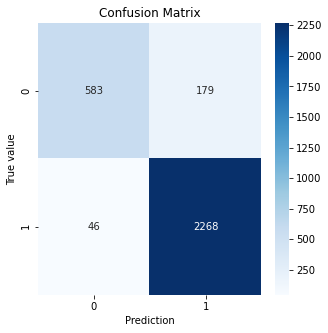

In [65]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

## Pipeline

* Final reviews used to check if the model works as well as expected

In [66]:
neg_test_review = "Worst phone I ever purchased. Bad battery and Camera backup"
pos_test_review = "Samsung phone is pretty good. Love the camera and speaker quality. JUST GO FOR IT!!!!!"

Create a predict_review function used to pre-process, transform and predict review sentiment

In [67]:
def predict_review(review):
  processed_review = process_review(review)
  transformed_review = tf.transform([processed_review])
  prediction = model_lr_tf.predict(transformed_review)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [68]:
predict_review(neg_test_review)

'Prediction is negative sentiment'

In [69]:
predict_review(pos_test_review)

'Prediction is positive sentiment'